<a href="https://colab.research.google.com/github/chohoon901/MachineLearning/blob/main/sunghuncho/ch08_ML_10_PCA_sunghuncho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필수 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://github.com/BigData23th/Data/raw/main/customer_pca.csv
df = pd.read_csv("https://github.com/BigData23th/Data/raw/main/customer_pca.csv")
df # 데이터 구조가 복잡해서 x, y축으로 하는 2차원 그래프로 나타낼 수가 X

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,1
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.965514,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038,3
96,-0.839991,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166,0
97,-1.107688,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335,0
98,-0.940815,-0.807895,-1.093267,-1.342878,-0.676572,-1.287731,-1.305887,-1.463747,-1.050452,-0.895722,-0.708094,0.954537,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amt                      100 non-null    float64
 1   category_entertainment   100 non-null    float64
 2   category_food_dining     100 non-null    float64
 3   category_gas_transport   100 non-null    float64
 4   category_grocery         100 non-null    float64
 5   category_health_fitness  100 non-null    float64
 6   category_home            100 non-null    float64
 7   category_kids_pets       100 non-null    float64
 8   category_misc            100 non-null    float64
 9   category_personal_care   100 non-null    float64
 10  category_shopping        100 non-null    float64
 11  category_travel          100 non-null    float64
 12  label                    100 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [4]:
# 종속변수와 독립변수 분리 (X, y)
X = df.drop('label', axis=1) # 독립변수들
y = df.label # 종속변수

# 그래프 표현을 위한 차원 축소

In [15]:
# PCA 알고리즘
from sklearn.decomposition import PCA

In [16]:
# 주성분갯수 2로 지정 (여러 개의 변수들의 특성을 2개로 합쳐서 처리)
pca = PCA(n_components=2)

In [17]:
pca.fit(X)
df_pca = pca.transform(X)
# pca.fit_transform(X)

In [18]:
# 주성분 2개를 가지는 2차원 배열(열 2개)이 됨
df_pca

array([[-3.92906072e+00,  1.02604491e-01],
       [ 3.10758276e+00, -1.74887930e+00],
       [ 3.02379272e+00,  3.21221215e+00],
       [-4.28241767e+00,  1.13781030e-02],
       [ 2.59065802e+00, -1.90612064e+00],
       [ 8.70343520e-01, -1.79154348e-02],
       [-1.16508938e+00,  2.00387900e+00],
       [ 1.41163657e+00, -1.21220170e+00],
       [ 1.79302072e-01, -1.15337545e+00],
       [-2.74166293e+00, -3.48112299e-02],
       [ 4.03108363e-01, -2.56426911e-01],
       [-4.32816586e+00,  1.09280479e-01],
       [-1.06779010e+00, -4.71336448e-01],
       [-3.54208654e+00,  2.09373453e-01],
       [ 3.00321739e+00,  6.85140300e-02],
       [ 5.08464052e+00, -1.92234923e+00],
       [-1.39044460e+00,  3.22162225e-01],
       [-2.64318989e+00, -4.59744830e-01],
       [-7.37714393e-01, -9.30393910e-01],
       [-3.93420145e+00,  1.62749639e-01],
       [ 3.16675507e-01, -4.22288613e-01],
       [ 7.31864853e+00,  5.17885391e-02],
       [ 6.60448573e-01, -1.13828656e+00],
       [-3.

In [19]:
# df하고 같은 index를 공유
df2 = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df2

,PC1,PC2
0,-3.929061,0.102604
1,3.107583,-1.748879
2,3.023793,3.212212
3,-4.282418,0.011378
4,2.590658,-1.906121
...,...,...
95,3.057868,-2.070061
96,-1.980872,-0.185124
97,-3.465385,1.022298
98,-3.277164,1.392480


In [20]:
# 목표변수들 (df) -> 차원축소 (df2) / index의 변화는 X -> y 라벨을 붙여서 연결
df2 = df2.join(y)
df2

,PC1,PC2,label
0,-3.929061,0.102604,0
1,3.107583,-1.748879,3
2,3.023793,3.212212,1
3,-4.282418,0.011378,0
4,2.590658,-1.906121,3
...,...,...,...
95,3.057868,-2.070061,3
96,-1.980872,-0.185124,0
97,-3.465385,1.022298,0
98,-3.277164,1.392480,0


<Axes: xlabel='PC1', ylabel='PC2'>

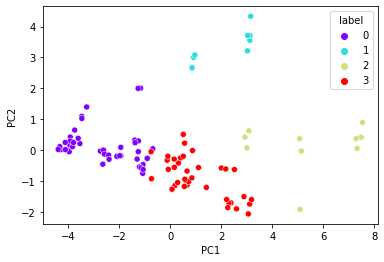

In [21]:
sns.scatterplot(x='PC1', y='PC2', hue='label', data=df2, palette='rainbow')
# 변수 자체에 대한 해석은 어렵지만, 특성별로 얼마나 잘 나뉘었는지는 확인 가능

In [22]:
# 각 주성분 (PC1, PC2)과 기존 독립변수 간의 관계 확인
pca.components_

array([[ 0.3484681 ,  0.32447242,  0.30303652,  0.14186907,  0.30618347,
         0.31297263,  0.29718852,  0.3045823 ,  0.29341337,  0.30287672,
         0.32053447,  0.08927503],
       [ 0.05827591,  0.06034266,  0.15264674, -0.54435586,  0.03109502,
         0.03790586,  0.23809571, -0.2315275 , -0.2471928 , -0.20898284,
         0.14479001,  0.65946781]])

In [23]:
# 주성분과 변수 간의 상관관계 df
df3 = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])
df3

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
PC1,0.348468,0.324472,0.303037,0.141869,0.306183,0.312973,0.297189,0.304582,0.293413,0.302877,0.320534,0.089275
PC2,0.058276,0.060343,0.152647,-0.544356,0.031095,0.037906,0.238096,-0.231528,-0.247193,-0.208983,0.144790,0.659468


<Axes: >

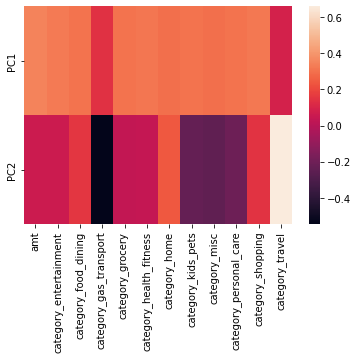

In [24]:
# 히트맵
sns.heatmap(df3, )

# 다차원 데이터 처리

In [25]:
anonymous = pd.read_csv('https://bit.ly/3Gl0qfO')
anonymous

,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296
0,1,0.000000,0.000000,0.56758,0.0,0.00000,0.0000,0.00000,0.825850,0.83788,...,-0.257770,0.122200,0.348620,0.129570,0.438460,-0.108020,0.128330,0.318820,-0.041559,0.22589
1,1,0.000000,0.000000,0.56758,0.0,0.00000,0.0000,0.00000,0.825850,0.83788,...,-0.153160,0.140620,-0.030201,0.101340,-0.145460,-0.166650,0.401300,0.035392,0.019906,0.31952
2,1,0.000000,0.000000,0.56758,0.0,0.00000,0.0000,0.00000,0.825850,0.83788,...,-0.401220,0.137900,0.138350,0.157460,0.512160,-0.330690,0.070346,0.179250,-0.188740,0.16386
3,1,0.000000,0.000000,0.56758,0.0,0.00000,0.0000,0.00000,0.825850,0.83788,...,-0.155870,-0.266860,0.158930,-0.132040,0.322210,-0.042086,0.588970,0.526990,-0.574320,0.20891
4,1,0.000000,0.000000,0.56758,0.0,0.00000,0.0000,0.00000,0.825850,0.83788,...,0.240200,0.446050,-0.163560,0.453110,0.590730,0.356800,0.395780,0.035871,-0.293430,0.38124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0.003989,0.316790,0.00000,0.0,0.75463,0.0000,0.54697,2.011200,0.00000,...,-0.091805,-0.032054,0.229830,-0.087756,0.276940,-0.322200,-0.053252,-0.156980,-0.043542,0.12565
19996,0,0.000000,2.601400,1.81890,0.0,0.00000,0.0000,0.25596,0.090454,0.00000,...,-0.369120,-0.384540,0.048926,0.383610,0.273910,-0.034337,-0.264020,0.016412,0.320100,0.25905
19997,0,0.000000,2.298500,0.95090,0.0,0.88928,0.0000,0.15201,0.000000,0.00000,...,-0.397390,0.317710,-0.215280,0.229490,0.190690,0.158690,0.185860,0.208300,0.082322,0.07128
19998,0,0.227150,0.049184,1.52300,0.0,1.44170,1.9881,0.57948,0.634800,0.00000,...,-0.368830,-0.271760,-0.006920,-0.235180,0.347830,0.534220,0.410420,0.172900,-0.204870,0.17142


In [26]:
anonymous['class'].value_counts()

0    15000
1     5000
Name: class, dtype: int64

In [27]:
anonymous.isna().sum().sum()

0

# PCA에 따른 모델링 성능/결과 비교

## PCA X

In [29]:
# 훈련셋/시험셋
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    anonymous.drop('class', axis=1), # X
    anonymous['class'], # y
    test_size=0.2,
    random_state=23
)

In [31]:
# 스케일링 작업
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
# 훈련셋 -> 훈련셋 스케일링
X_train_scaled=scaler.transform(X_train)
# (모델링 훈련된 건 훈련셋 기준이기 때문에 스케일링 기준도 훈련셋)
# 훈련셋 -> 시험셋 스케일링 
X_test_scaled=scaler.transform(X_test)
# ---
# X_train에 대한 학습 및 변환
# 이미 학습된 X_train을 바탕으로 X_test를 학습

In [33]:
# 모델링 (랜덤포레스트)
from sklearn.ensemble import RandomForestClassifier # class -> 1,0 이진분류

model_1=RandomForestClassifier(random_state=23)

In [34]:
# 시간측정 (PCA을 안한 원본 데이터 학습 속도)
import time
start_time = time.time()
model_1.fit(X_train_scaled, y_train)
print(time.time() - start_time)

123.45282769203186


In [35]:
# 모델 평가
from sklearn.metrics import accuracy_score, roc_auc_score

# 첫번째 모델을 통한 예측값
pred_1 = model_1.predict(X_test_scaled)
accuracy_score(y_test, pred_1) # 정확도, 일치도
# 0.75

0.95525

In [36]:
# '1'으로 분류할 확률값
proba_1 = model_1.predict_proba(X_test_scaled) # 1번째 열들만 선택
# proba_1[:, 1] -> : - 모든 행 / 1 - 열의 인덱스
roc_auc_score(y_test, proba_1[:, 1])

0.9967081026539351

## PCA O

In [37]:
pca=PCA(n_components=2)# 2차원으로 축소 (주성분 2개)
pca.fit(X_train_scaled)# 스케일링한 독립변수들을 가진 훈련셋 데이터를...


PCA(n_components=2)

In [39]:
# explained_variance_ratio_ : 기존 변수들의 분산을 (새롭게 만든) 주성분이 어느 비율로 설명(나타내 주고 있는지)해주고 있는지
pca.explained_variance_ratio_# 기본 변수들을 얼마 정도 반영하였냐 -> 0.08? 100% -> 8% 밖에 설명을 못해주고 있음

array([0.04994823, 0.03325914])

In [40]:
# 적절한 주성분 갯수를 찾기 위해 반복문 사용 (엘보우 기법)
var_ratio = [] # ratio를 받아줄 리스트
for i in range(100, 550, 50): # 반복문
    # 100, 150, 200, ...., 500
    pca = PCA(n_components=i) # 주성분의 갯수 i
    pca.fit_transform(X_train_scaled) # 훈련셋의 스케일링된 데이터 -> 학습 및 변환
    ratio = pca.explained_variance_ratio_.sum() # 기존 변수에 대한 설명력
    var_ratio.append(ratio)

<Axes: >

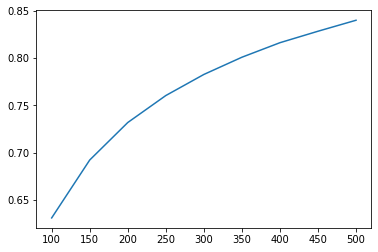

In [42]:
# range(100, 550, 50) -> 기존 변수에 대한 설명력 (ratio 원소)
sns.lineplot(x=range(100,550,50),y=var_ratio)

In [43]:
# 80% -> 400
list(zip(range(100,500,50),var_ratio))

[(100, 0.6306975211226383),
 (150, 0.6920857346266955),
 (200, 0.7318480832977399),
 (250, 0.7604559637320858),
 (300, 0.7828176848544023),
 (350, 0.8010814797988717),
 (400, 0.8164883099992496),
 (450, 0.8286466606638849)]

In [44]:
# 4000개 넘는 변수(차원) -> 400개 (80%)
# 1. 속도
# 2. 평가 (정확성, 점수...) -> accuracy score, roc_auc_score...

In [45]:
# 차원축소 -> 4000이상 => 400. 80%
pca=PCA(n_components=400,random_state=23)
X_train_scaled_pca=pca.fit_transform(X_train_scaled)
X_test_scaled_pca=pca.transform(X_test_scaled)

In [46]:
# 모델링
model_2=RandomForestClassifier(random_state=23)
start_time=time.time()
model_2.fit(X_train_scaled_pca,y_train)

# pca(차원축소)한 데이터
print(time.time() - start_time) # 속도는 개선

75.27795457839966


In [47]:
# 정확도
pred_2=model_2.predict(X_test_scaled_pca)
accuracy_score(y_test,pred_2)
# 원본 : 0.95725 / 오버피팅 개선?

0.98925

In [49]:
# AUC
proba_2=model_2.predict_proba(X_test_scaled_pca)
roc_auc_score(y_test,proba_2[:,1])
# 원본 : 0.997310102316542

0.9985714562827814